In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [4]:
# Load datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [5]:
# Data Exploration
print("Training Data Overview:")
print(train_df.head())
print("\nMissing Values:")
print(train_df.isnull().sum())

Training Data Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

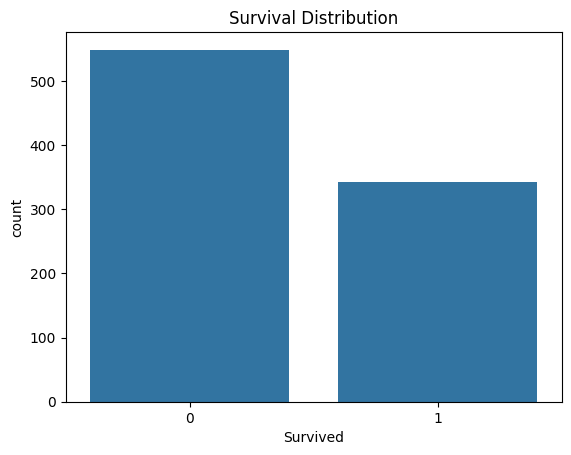

In [6]:
# Visualizations
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

In [7]:
# Data Preprocessing
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

<ipython-input-7-678c6121885d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-7-678c6121885d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inpl

In [8]:
# Splitting data
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

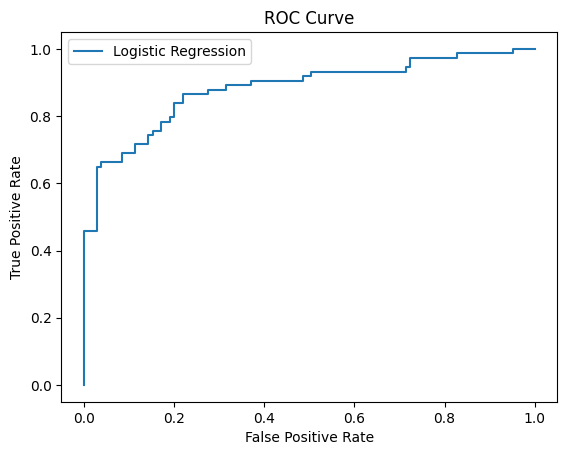

In [12]:
# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
# Interpretation of Coefficients
feature_names = X.columns
coefficients = model.coef_[0]
coefficient_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("\nLogistic Regression Coefficients:")
print(coefficient_df.sort_values(by='Coefficient', ascending=False))


Logistic Regression Coefficients:
    Feature  Coefficient
1       Sex     1.278865
5      Fare     0.126216
4     Parch    -0.098292
6  Embarked    -0.170860
3     SibSp    -0.349582
2       Age    -0.395574
0    Pclass    -0.782061


In [14]:
# Discussion of Feature Importance
print("\nFeature Significance:")
print("Positive coefficients indicate features that increase survival probability, while negative coefficients indicate features that reduce survival probability.")
print("For example, being female (Sex=1) significantly increases the likelihood of survival, while higher passenger class (Pclass=3) reduces survival chances.")


Feature Significance:
Positive coefficients indicate features that increase survival probability, while negative coefficients indicate features that reduce survival probability.
For example, being female (Sex=1) significantly increases the likelihood of survival, while higher passenger class (Pclass=3) reduces survival chances.
